# Spectral solar irradiance

SIM SORCE: [source](ftp://acdisc.gsfc.nasa.gov/data/s4pa/SORCE_Level3/SOR3XPSD.010/sorce_xps_L3_c24h_v10_20030210_20110502.txt)

Column definitions: 
```
; 0 nominal_date_yyyymmdd, R8, f10.1
; 1 nominal_date_jdn, R8, f10.1
; 2 min_wavelength, R4, f8.2 (nm)
; 3 max_wavelength, R4, f8.2 (nm)
; 4 instrument_mode_id, I2, i3
; 5 data_version, I2, i3
; 6 irradiance, R4, e11.4 (W/m^2/nm)
; 7 irradiance_uncertainty, R4, e11.4 (W/m^2/nm, 1 sigma)
; 8 quality, R4, f8.4 (avg # days between nominal date and measurement times)
```

In [8]:
%matplotlib inline

from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import h5py

path = 'sorce_sim.npy'
data = np.load(path)

# dimensions: (time, wavelengths, 2=[data/uncertainty])

In [10]:
unique_dates = list(set(data[:, 1]))
unique_min_wavelengths = list(set(data[:, 2]))

n_per_day = np.zeros(len(unique_dates))

for i, jd in enumerate(unique_dates):
    current_date = data[:, 1] == jd
    n_per_day[i] = np.count_nonzero(current_date)

complete_dates = np.array(unique_dates)[n_per_day == 1217]
n_days = len(complete_dates)
# Create hdf5 archive: 
#a = np.zeros((n_dates, n_wavelengths, 2))

import h5py
try: 
    f.close()
except (NameError, ValueError):
    pass

f = h5py.File('sorce_sim.hdf5', 'w')
spectra = f.create_dataset('spectra', dtype=np.float64,
                           shape=(n_days, len(unique_min_wavelengths), 2))#,
                 #compression=compression)

jd_lookup = {}

example_date = complete_dates[0]
current_date = data[:, 1] == example_date
mean_wavelength = np.mean(data[current_date, 2:4], axis=1)
spectra.attrs['wavelengths'] = mean_wavelength
spectra.attrs['jd'] = complete_dates

for i, jd in enumerate(complete_dates):
    current_date = data[:, 1] == jd
    irrad = data[current_date, 6]
    irrad_err = data[current_date, 7]
    spectra[i, :, 0] = irrad
    spectra[i, :, 1] = irrad_err
    jd_lookup[jd] = i
f.flush()
#f.close()

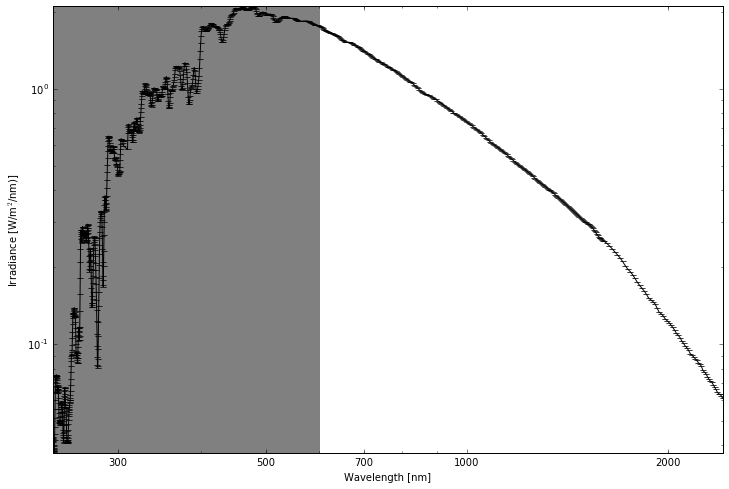

In [11]:
#f = h5py.File('sorce_sim.hdf5', 'r')

date = 0
lower_wavelength_limit = 600 # nm

spectrum = spectra[date, :, 0]
uncertainty = spectra[date, :, 1]

fig, ax = plt.subplots(figsize=(12, 8))
ax.errorbar(mean_wavelength, spectrum, uncertainty, color='k')
ax.set_xscale("log")
ax.set_yscale("log")
ax.fill_between([0, 600], spectrum.min(), spectrum.max(), color='gray')
ax.set(xlim=(mean_wavelength.min(), mean_wavelength.max()),
       ylim=(spectrum.min(), spectrum.max()), 
       xlabel='Wavelength [nm]', ylabel='Irradiance [W/m$^2$/nm)]')

xticks=[300, 500, 700, 1000, 2000]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

plt.show()

In [1]:
f.close()

NameError: name 'f' is not defined

In [ ]:
!chmod 777 sorce_sim.hdf5